In [1]:
!pip install wikipedia

In [2]:
!pip install pyttsx3


In [3]:
import os
import numpy as np
import wikipedia
import pyttsx3
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model

In [5]:
# Load your trained model
model_path = r"C:\Users\Admin\anaconda3\Lib\site-packages\pandas\io\parsers\__pycache__\__pycache__\New folder\model_class_colab_final.h5"
model = load_model(model_path)

In [6]:
dataset_path = r"C:\Users\Admin\anaconda3\Lib\site-packages\pandas\io\parsers\__pycache__\archive 11\105_classes_pins_dataset"

In [7]:
class_to_name = {i: name for i, name in enumerate(os.listdir(dataset_path))}


In [8]:
# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((160, 160))  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

In [10]:
# Function to predict the celebrity
def predict_celebrity(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class


In [11]:
# Function to retrieve Wikipedia description
def get_wikipedia_description(name):
    try:
        result = wikipedia.search(name)
        if result:
            page = wikipedia.page(result[0])
            return page.summary[:1000]  # Get the first 1000 characters
        else:
            return 'No description available'
    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation error: {e.options}"
    except wikipedia.exceptions.PageError:
        return 'Page not found'

In [12]:
# Function to convert text to speech
def speak_text(text):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

In [13]:
# Function to display the image
def display_image(image_path, title):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [15]:
def main(image_path):
    predicted_class = predict_celebrity(image_path)
    celebrity_name = class_to_name.get(predicted_class, 'Unknown')

    if celebrity_name == 'Unknown':
        description = 'Celebrity not recognized by the model.'
    else:
        description = get_wikipedia_description(celebrity_name)

    # Display the image with the celebrity name as the title
    display_image(image_path, f"Celebrity: {celebrity_name}")

    # Print the description
    print(f"Celebrity Name: {celebrity_name}")
    print(f"Description: {description}")

    # Convert the description to speech
    speak_text(description)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


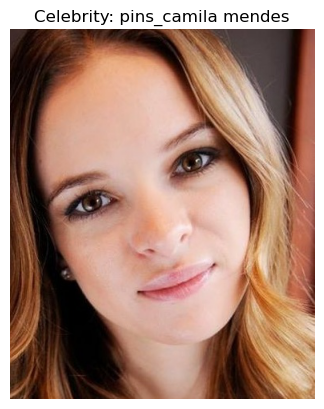

Celebrity Name: pins_camila mendes
Description: Karla Camila Cabello Estrabao (; Latin American Spanish: [ˈkaɾla kaˈmila kaˈβeʝo esˈtɾabao]; born March 3, 1997) is an American singer and songwriter. She rose to prominence as a member of the pop girl group Fifth Harmony, which became one of the best-selling girl groups of all time. While in the group, Cabello began to establish herself as a solo artist with the release of her collaborative singles "I Know What You Did Last Summer" (with Shawn Mendes) and "Bad Things" (with Machine Gun Kelly)—the latter peaked at number four on the US Billboard Hot 100. She left Fifth Harmony in late 2016.
Cabello's debut studio album, Camila (2018), peaked atop the US Billboard 200, received platinum certification by the Recording Industry Association of America (RIAA), and saw generally positive critical reception. Largely influenced by Latin music, its lead single "Havana" (featuring Young Thug) received diamond certification by the RIAA, peaked atop 

In [ ]:
image_path = r"C:\Users\Admin\anaconda3\Lib\site-packages\pandas\io\parsers\__pycache__\archive 11\105_classes_pins_dataset\pins_Danielle Panabaker\Danielle Panabaker48_1520.jpg"
main(image_path)